# Submission 1: Classical Denoising
Implementation of the following:
1. Median Filter: Replace each pixel with the median value of its neighboring pixels

2. Mean Filter: Replace each pixel with the mean value of its neighboring pixels

3. Bilateral Filter: Preserves edges while reducing noise by taking into account both spatial and intensity differences.

4. Gaussian Blur: Apply a convolution operation using a gaussian kernel to smoothen the image

### Load Image

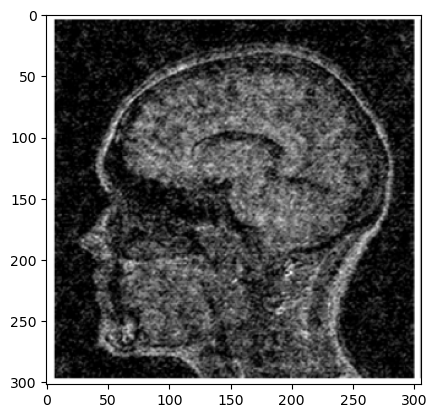

In [1]:
import cv2 as cv
import matplotlib.pyplot as pyplot

img = cv.imread("images/noisy.png")
pyplot.imshow(img)

### Median Filter

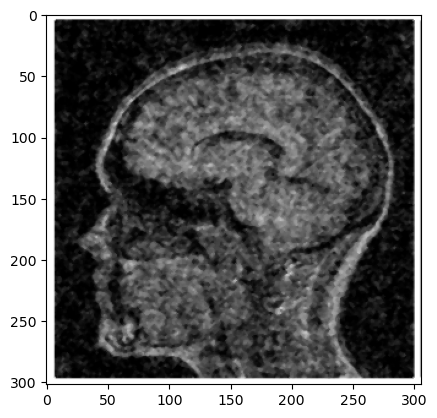

In [10]:
kernel_size = 3
median_filter = cv.medianBlur(img, kernel_size)

pyplot.imshow(median_filter)

### Mean Filter

### Bilateral Filter

### Gaussian Blur

## Evaluating denoising techniques

**Which method had the best score? Why do you think this denoising method performed the best (explain in terms of its inherent steps / properties)?**

{Answer}